In [2]:
import rustworkx as rx
from rustworkx.visualization import mpl_draw as draw_graph
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
import itertools
import pickle

In [19]:
def generate_fully_connected_graph(n_nodes):
    # Create a complete graph adjacency matrix (no self-loops)
    adj_matrix = np.ones((n_nodes, n_nodes), dtype=np.int32) - np.eye(n_nodes, dtype=np.int32)

    # Create a rustworkx PyGraph
    graph_ = rx.PyGraph()
    graph_.add_nodes_from(range(n_nodes))

    for i in range(n_nodes):
        for j in range(i+1, n_nodes):  # Upper triangle to avoid duplicates
            graph_.add_edge(i, j, 1.0)

    return adj_matrix, graph_

In [8]:
def generate_connected_er_graphs(n_nodes, batch_size, p_connection, seed=None):
    if seed is not None:
        np.random.seed(seed)

    batch = np.zeros((batch_size, n_nodes, n_nodes), dtype=np.int32)

    for b in range(batch_size):
        connected = False
        while not connected:
            g = nx.erdos_renyi_graph(n_nodes, p_connection)
            connected = nx.is_connected(g)

        # Convert to adjacency matrix
        adj = nx.to_numpy_array(g, dtype=np.int32)
        np.fill_diagonal(adj, 0)  # No self-loops

        batch[b] = adj

    return batch

# Parameters
n = 10
p_connection = 0.4
adj_matrix  = generate_connected_er_graphs(n, 1, p_connection, None)[0]

# Create a rustworkx PyGraph
graph_ = rx.PyGraph()
graph_.add_nodes_from(np.arange(n))

# Add edges from adjacency matrix
for i in range(n):
    for j in range(i+1, n):  # Only upper triangle to avoid duplicates
        if adj_matrix[i, j] == 1:
            graph_.add_edge(i, j, 1.0)



In [4]:
adj_matrix, graph_ = generate_fully_connected_graph(10)

NameError: name 'generate_fully_connected_graph' is not defined

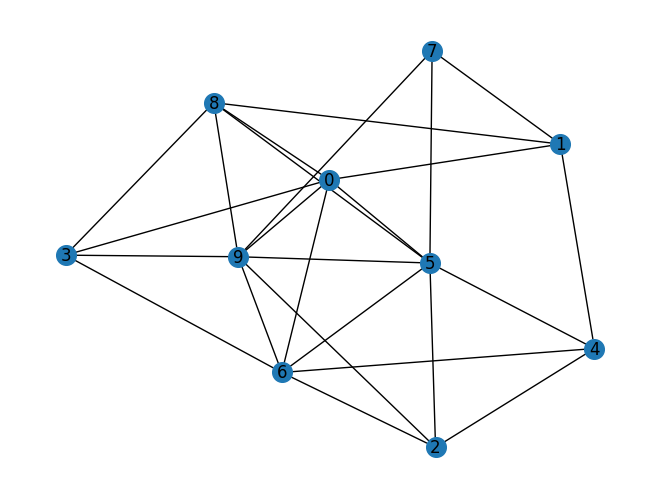

In [9]:
# Draw (you can use your existing draw_graph function)
draw_graph(graph_, node_size=200, with_labels=True, width=1)

In [10]:
def brute_force_max_cut(adj_matrix):
    n = adj_matrix.shape[0]
    nodes = list(range(n))
    max_cut_value = 0
    best_partition = None

    # Try all possible partitions (excluding symmetric duplicates)
    for bits in itertools.product([0, 1], repeat=n):
        if all(b == 0 for b in bits) or all(b == 1 for b in bits):
            continue  # Skip trivial partitions

        cut_value = 0
        for i in range(n):
            for j in range(i+1, n):
                if bits[i] != bits[j] and adj_matrix[i, j] == 1:
                    cut_value += 1

        if cut_value > max_cut_value:
            max_cut_value = cut_value
            best_partition = bits

    return max_cut_value, best_partition

# Example usage
max_cut_value, best_partition = brute_force_max_cut(adj_matrix)
print(f"Max Cut Value: {max_cut_value}")
print(f"Partition (0s and 1s represent groups): {best_partition}")

Max Cut Value: 18
Partition (0s and 1s represent groups): (0, 1, 0, 0, 0, 1, 1, 0, 0, 1)


In [11]:
# Save
with open("10_graph_18.pkl", "wb") as f:
    pickle.dump(graph_, f)


In [55]:
# Load
with open("25_graph_83.pkl", "rb") as f:
    g_loaded = pickle.load(f)

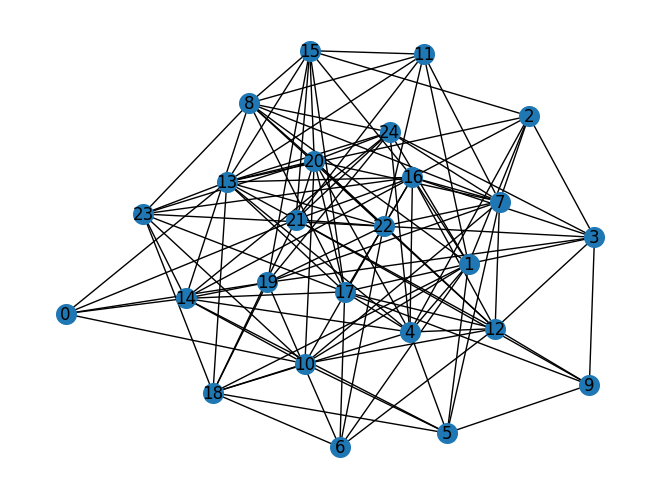

In [56]:
draw_graph(g_loaded, node_size=200, with_labels=True, width=1)